# Análise de Regras de Associação com FP-Growth

## Objetivo

Este código realiza uma análise de regras de associação utilizando o algoritmo **FP-Growth** para identificar padrões de compra frequentes entre produtos, auxiliando na compreensão do comportamento de compra dos clientes.

## Processo de Análise

### 1. Preparação dos Dados
- **Carregamento do arquivo CSV**
- **Agrupamento das compras por ID**
- **Criação de lista de produtos por compra**

### 2. Transformação dos Dados
- **Aplicação de One-Hot Encoding**
- **Conversão dos produtos em formato binário**
- **Criação de matriz de transações**

### 3. Aplicação do FP-Growth
- **Configuração do suporte mínimo (1%)**
- **Identificação de itens frequentes**
- **Geração de conjuntos de itens**

### 4. Geração de Regras
- **Cálculo de métricas**:
  - Suporte (support)
  - Confiança (confidence)
  - Lift
- **Filtragem por lift mínimo (1)**

### 5. Análise dos Resultados
- **Top 5 regras por**:
  - Lift (força da associação)
  - Confiança (probabilidade)
  
### Métricas Utilizadas
- **Suporte (Support)**: Frequência com que os itens aparecem juntos
- **Confiança (Confidence)**: Probabilidade de compra do consequente dado o antecedente
- **Lift**: Força da associação entre os itens

### Resultado
- Identificação de padrões de compra
- Regras de associação entre produtos
- Insights sobre comportamento do consumidor
- Dados para estratégias de marketing
- Recomendações de produtos relacionados

### Benefícios
- Descoberta de relações entre produtos
- Otimização de estratégias de venda
- Melhoria no posicionamento de produtos
- Aumento potencial de vendas cruzadas
- Insights para ações de marketing

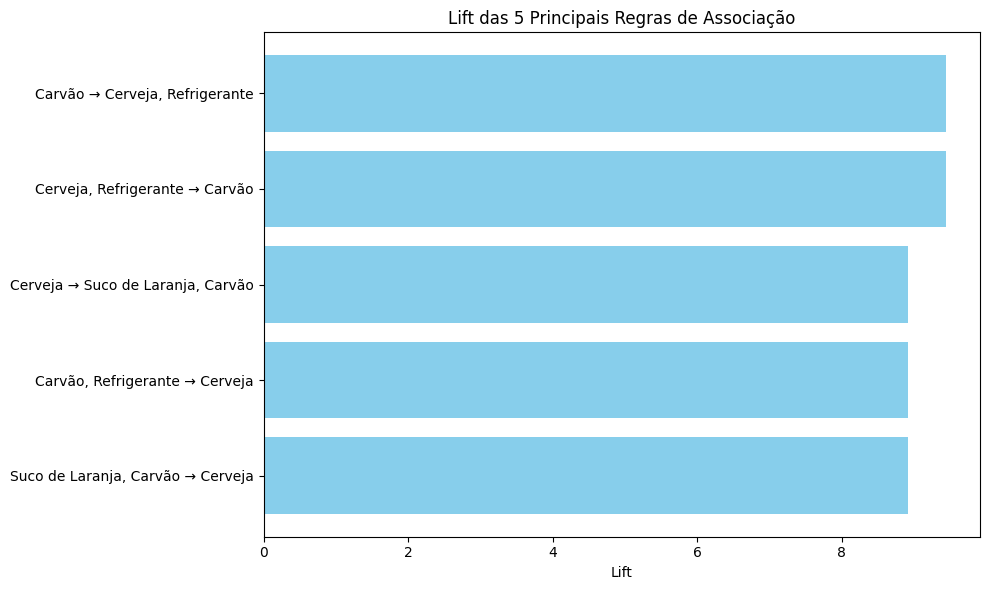

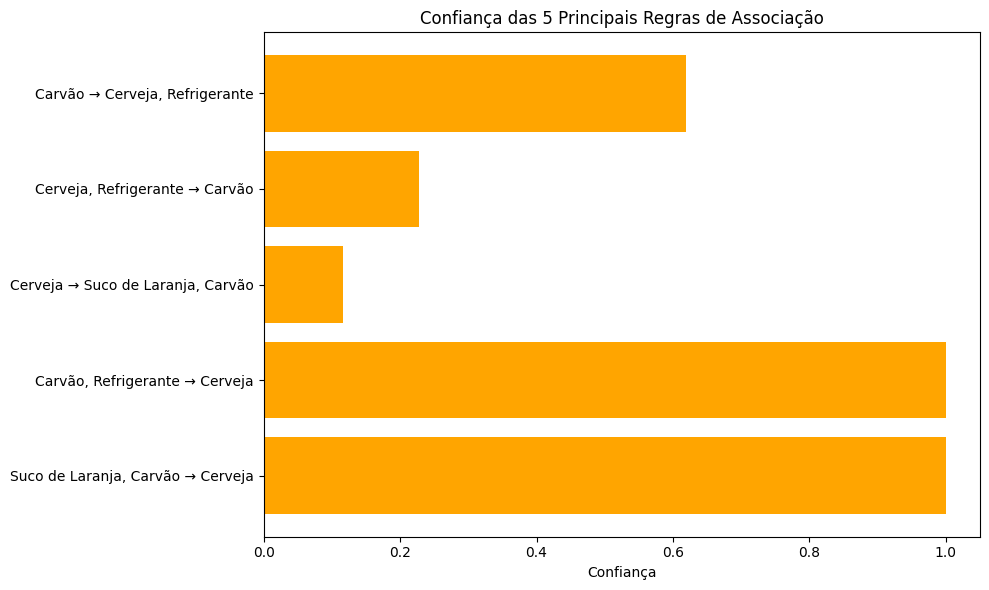

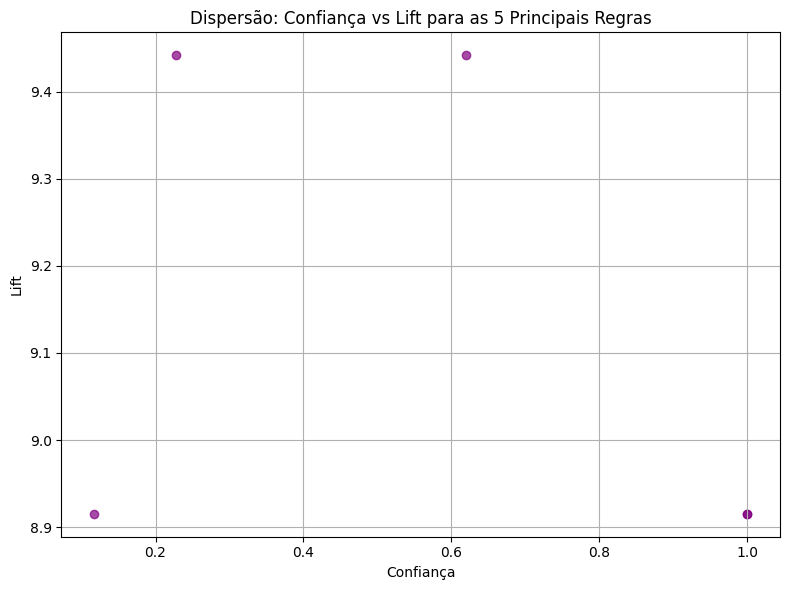

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Carregar os dados
df = pd.read_csv("novo_arquivo.csv")

# Agrupar as compras
basket = df.groupby('id_da_compra')['produto'].apply(list)

# One-Hot Encoding dos produtos
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar FP-Growth para encontrar os itemsets frequentes
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Gerar regras de associação a partir dos itemsets frequentes
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Selecionar as 5 regras com maior Lift
top_5_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(5)

# Função para calcular o Lift e a Confiança
def calculate_lift_and_confidence(itemset_1, itemset_2):
    # Suporte de A (contagem das transações que contêm todos os itens de itemset_1)
    support_A = df_encoded[itemset_1].all(axis=1).mean()
    
    # Suporte de B (contagem das transações que contêm todos os itens de itemset_2)
    support_B = df_encoded[itemset_2].all(axis=1).mean()
    
    # Suporte de A ∩ B (transações que contêm todos os itens de itemset_1 e itemset_2)
    support_A_and_B = df_encoded[itemset_1 + itemset_2].all(axis=1).mean()
    
    # Calcular Lift
    lift = support_A_and_B / (support_A * support_B) if support_A * support_B != 0 else 0
    
    # Calcular Confiança
    confidence = support_A_and_B / support_A if support_A != 0 else 0
    
    return lift, confidence

# Listas para armazenar os resultados
lifts = []
confidences = []
rules_pairs = []

# Calcular Lift e Confiança para as 5 regras mais frequentes
for _, row in top_5_rules.iterrows():
    itemset_A = list(row['antecedents'])
    itemset_B = list(row['consequents'])
    
    lift_value, confidence_value = calculate_lift_and_confidence(itemset_A, itemset_B)
    
    lifts.append(lift_value)
    confidences.append(confidence_value)
    rules_pairs.append(f"{', '.join(itemset_A)} → {', '.join(itemset_B)}")

# Gerar gráficos

# 1. Gráfico de Lift
plt.figure(figsize=(10, 6))
plt.barh(rules_pairs, lifts, color='skyblue')
plt.xlabel('Lift')
plt.title('Lift das 5 Principais Regras de Associação')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. Gráfico de Confiança
plt.figure(figsize=(10, 6))
plt.barh(rules_pairs, confidences, color='orange')
plt.xlabel('Confiança')
plt.title('Confiança das 5 Principais Regras de Associação')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Gráfico de Dispersão: Lift vs Confiança
plt.figure(figsize=(8, 6))
plt.scatter(confidences, lifts, alpha=0.7, color='purple')
plt.xlabel('Confiança')
plt.ylabel('Lift')
plt.title('Dispersão: Confiança vs Lift para as 5 Principais Regras')
plt.grid(True)
plt.tight_layout()
plt.show()
